In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sb

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
0                  5.1               3.5  ...               0.2        0
1                  4.9               3.0  ...               0.2        0
2                  4.7               3.2  ...               0.2        0
3                  4.6               3.1  ...               0.2        0
4                  5.0               3.6  ...               0.2        0
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        2
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        2
148                6.2               3.4  ...               2.3        2
149                5.9               3.0  ...               1.8        2

[150 rows x 5 columns]


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.isnull().sum() #fill with high frq 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [ ]:
df.corr(method ='pearson') 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


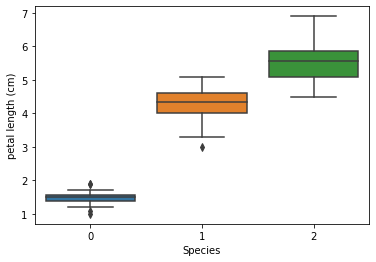

In [ ]:
sb.boxplot(x="Species",y ="petal length (cm)",data=df)

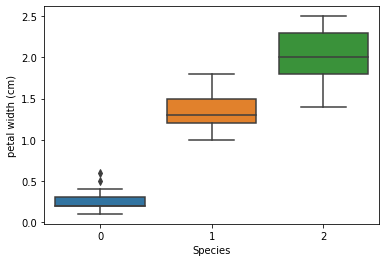

In [ ]:
sb.boxplot(x="Species",y ="petal width (cm)",data=df)

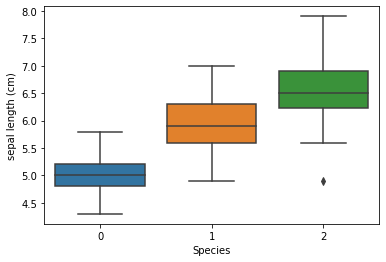

In [ ]:
sb.boxplot(x="Species",y ="sepal length (cm)",data=df)


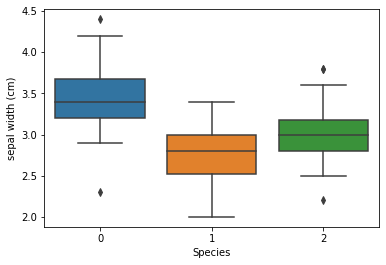

In [ ]:
sb.boxplot(x="Species",y ="sepal width (cm)",data=df)

In [ ]:
cls_0 = df.loc[df['Species'] == 0]
cls_1 = df.loc[df['Species'] == 1]
cls_2 = df.loc[df['Species'] == 2]

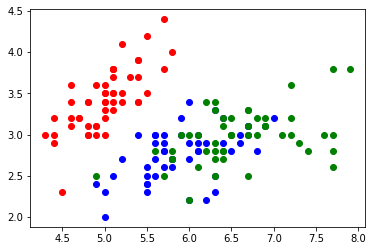

In [ ]:
plt.scatter(cls_0['sepal length (cm)'], cls_0['sepal width (cm)'],color='red',)
plt.scatter(cls_1['sepal length (cm)'], cls_1['sepal width (cm)'],color='blue')
plt.scatter(cls_2['sepal length (cm)'], cls_2['sepal width (cm)'],color ='green')
plt.show()

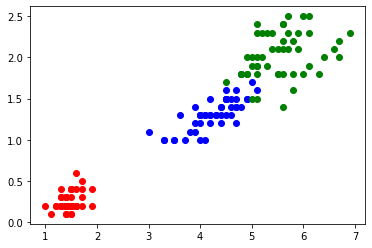

In [ ]:
plt.scatter(cls_0['petal length (cm)'], cls_0['petal width (cm)'],color='red',)
plt.scatter(cls_1['petal length (cm)'], cls_1['petal width (cm)'],color='blue')
plt.scatter(cls_2['petal length (cm)'], cls_2['petal width (cm)'],color ='green')
plt.show()

In [ ]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
142,5.8,2.7,5.1,1.9,2


In [ ]:
#df = df.drop(142)

In [ ]:
df['Species'].unique()
print(df.groupby('Species').size())

Species
0    50
1    50
2    50
dtype: int64


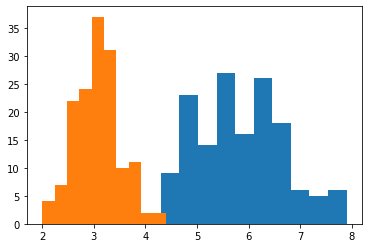

In [ ]:
plt.hist(df['sepal length (cm)'])
plt.hist(df['sepal width (cm)'])
plt.show()

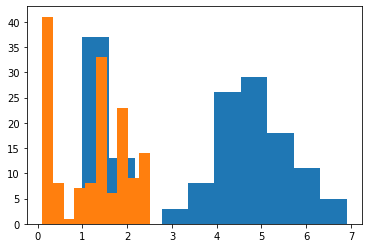

In [ ]:
plt.hist(df['petal length (cm)'])
plt.hist(df['petal width (cm)'])
plt.show()

In [ ]:
col_names = ['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']

In [ ]:
for col in col_names:
  data_mean, data_std = np.mean(df[col]), np.std(df[col])
  cut_off = data_std * 3
  lower, upper = data_mean - cut_off, data_mean + cut_off
  print(lower,upper)
  index_names = df[ (df[col] < lower) | (df[col] > upper )].index 
  df.drop(index_names, inplace = True)

3.367429457977912 8.319237208688758
1.754100430126851 4.3605662365398175
-1.4933878453155098 9.03969657014773
-1.0735039458385645 3.4828999189929286


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
target = df['Species']
df = df.drop('Species',axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df,target, test_size = 0.3, random_state = 10) #####no stratify doubt 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

# Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8666666666666667

#Decision tree 

In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dtree = dtree.predict(x_test)
accuracy_score(y_test,y_pred_dtree)

0.9777777777777777

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2, random_state=48)
rf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rf)

1.0